🧩 ¿Qué es una SVM?
Support Vector Machine (SVM) es un algoritmo de aprendizaje supervisado que se usa tanto para clasificación como para regresión, aunque es más famoso por lo primero.

Su objetivo principal es encontrar un hiperplano óptimo que separe las clases de datos de la mejor forma posible.
🎯 ¿Qué hace especial a SVM?
- Encuentra la mejor separación posible entre clases.
- Puede trabajar en espacios de muchas dimensiones.
- Funciona muy bien cuando las clases no están claramente separadas.
- Se puede extender a problemas no lineales mediante kernels.

In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\steve\OneDrive\Documentos\python\base_datos_2008.csv")
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1)
df = df.head(1000)
dftest = df.tail(1000)

In [5]:
X = df[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]
X_test = dftest[["Distance", "AirTime", "DepTime", "TaxiIn", "TaxiOut", "DepDelay"]]

Y = df["ArrDelay"] > 10
Y_test = dftest["ArrDelay"] > 10

clf = SVC(kernel= "linear")# Linear / Poly / rbf /sigmoid
clf.fit(X,Y)
Y_predict = clf.predict(X_test)

In [ ]:
np.mean(Y_test == Y_predict) # primer pureba con clf = SVC()

np.float64(0.741)

In [ ]:
np.mean(Y_test == Y_predict)#Pruba con clf = SVC(kernel= "linear")

np.float64(0.907)

# Resumen 
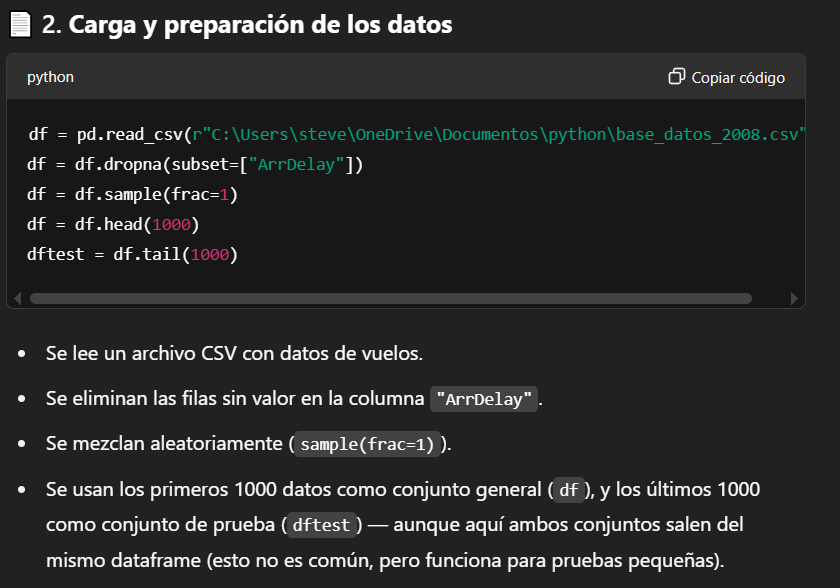
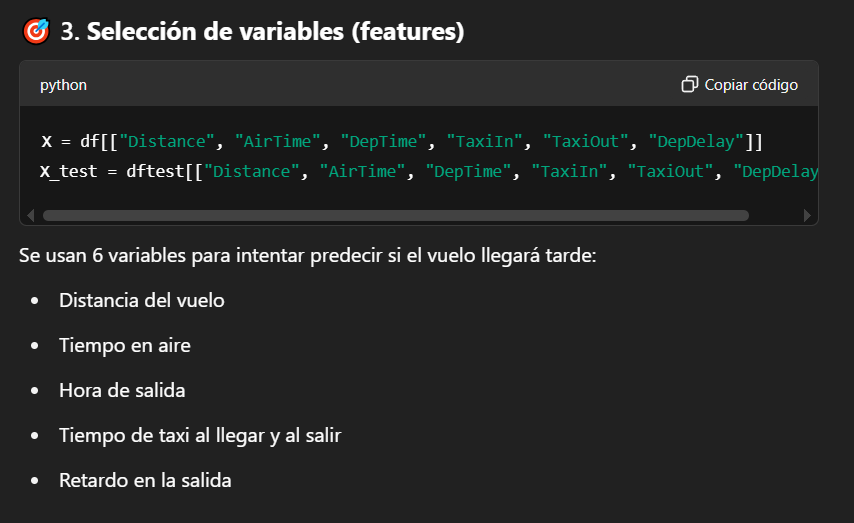
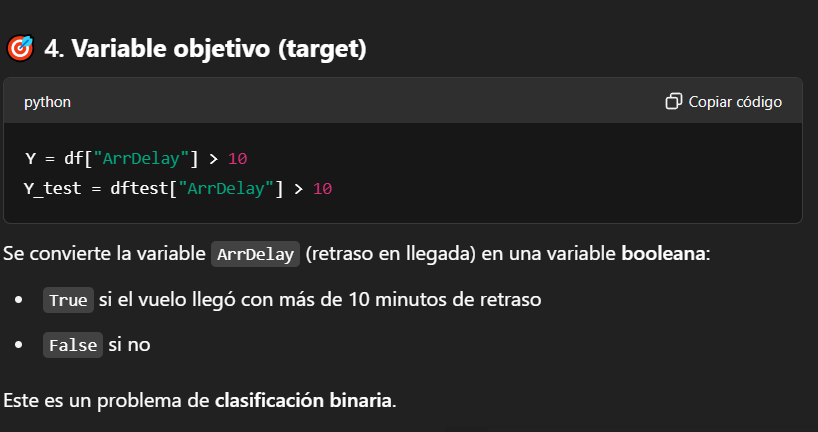
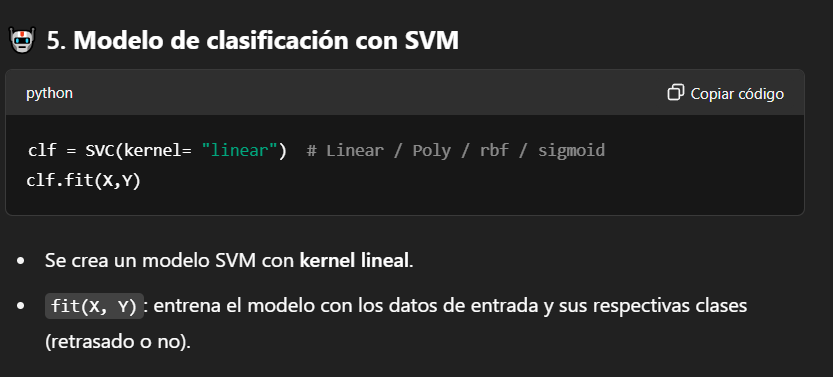
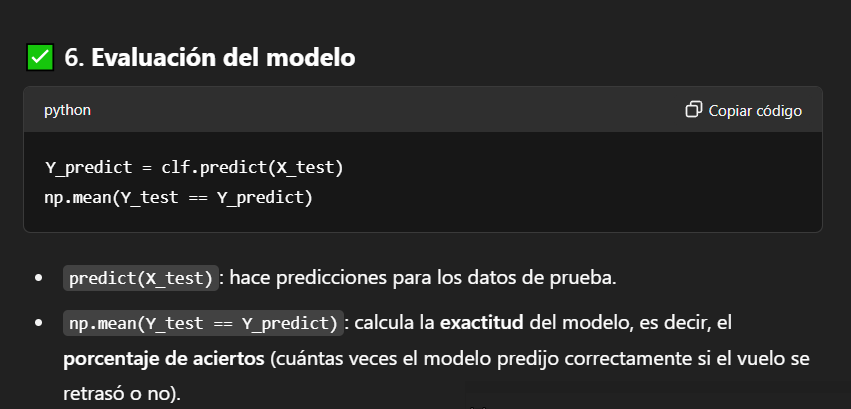
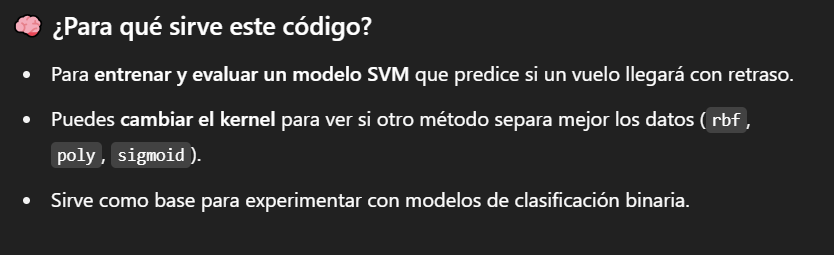

# Metricas del modelo 
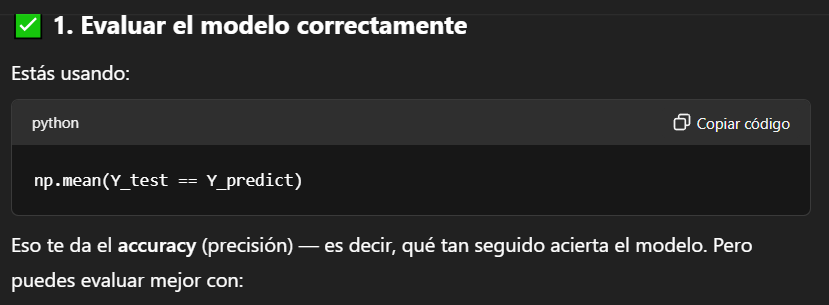
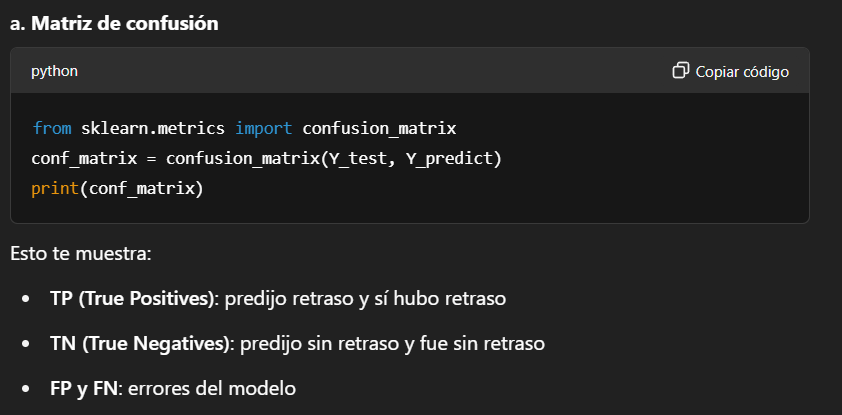

In [7]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)
print(conf_matrix)

[[699  31]
 [ 62 208]]


In [8]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94       730
        True       0.87      0.77      0.82       270

    accuracy                           0.91      1000
   macro avg       0.89      0.86      0.88      1000
weighted avg       0.91      0.91      0.91      1000



# Poner a prueba elmodelo

In [9]:

nuevo = pd.DataFrame([{
    "Distance": 1000,
    "AirTime": 120,
    "DepTime": 930,
    "TaxiIn": 5,
    "TaxiOut": 15,
    "DepDelay": 20
}])

retrasado = clf.predict(nuevo)
print("¿Tendrá retraso?", retrasado[0])

¿Tendrá retraso? False


📊 3. Visualización (opcional, para comprensión)
Como SVM trabaja mejor visualmente en 2D, podrías reducir las variables con PCA o usar solo dos, por ejemplo:

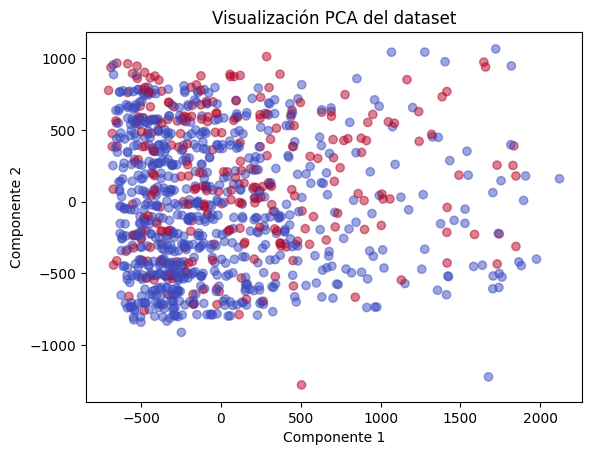

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='coolwarm', alpha=0.5)
plt.title("Visualización PCA del dataset")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

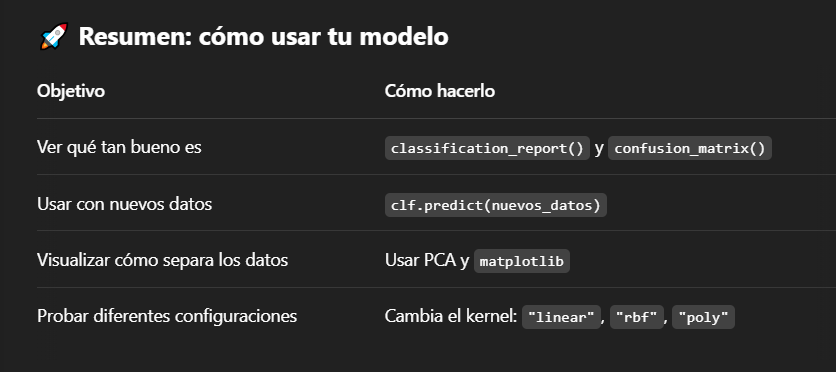